In this example, we will use 20 fold cross-validation to discover the optimal alpha hyperparameter for a LASSO Regularized Generalized Linear Model (GLM) for fitting a model to the data. 



Computing regularization path using the coordinate descent lasso...


NameError: name 't_lasso_cv' is not defined

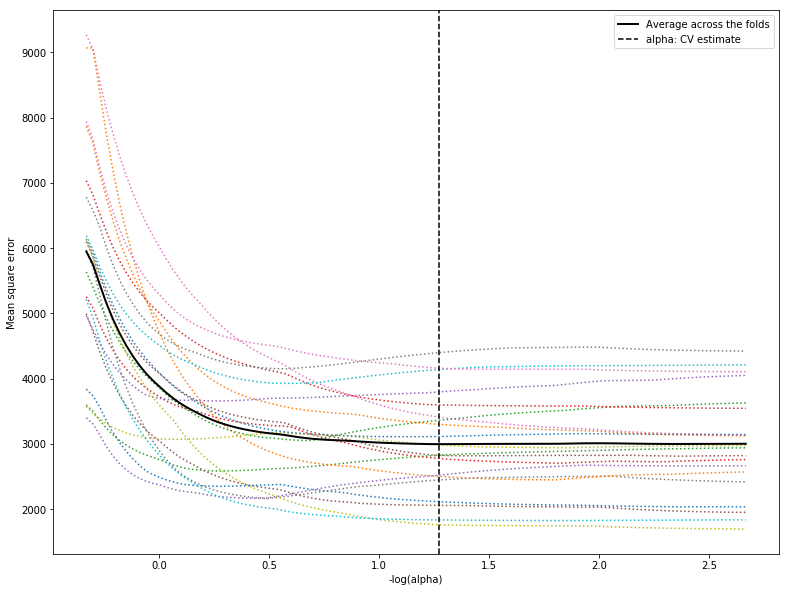

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
model = LassoCV(cv=20).fit(X, y)

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure(figsize=(13, 10))
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)

#plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()